In [44]:
#!/home/guillermo.valdes/.conda/envs/hht-py37/bin/python

# Usage:
# ./Triggers -s gps start -e gps -snr snr

In [45]:
from gwtrigfind import find_trigger_files
from gwpy.table import EventTable
from gwpy.time import tconvert, to_gps
import numpy as np
import pandas as pd
import sys

In [46]:
from gwpy.segments import DataQualityDict
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from gwpy.table import Table
from gwpy.plot import Plot
from gwpy.time import tconvert, to_gps
import IPython
from gwpy.segments import DataQualityFlag
from gwpy.timeseries import TimeSeries                          
from gwpy.plot import Plot

In [47]:
gps_b = to_gps('May 17 2019 00:00:00')
gps_e = to_gps('May 18 2019 00:00:00')
duration = 6

### Observing segments

79919


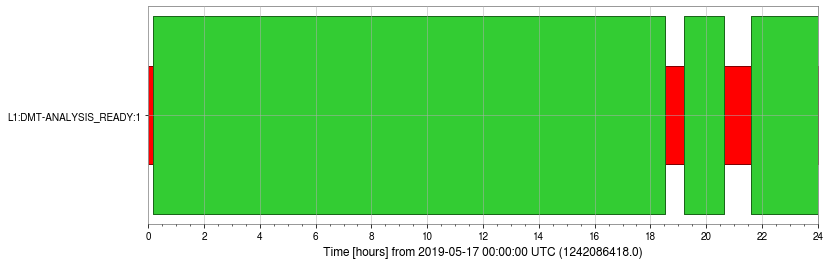

In [48]:
l1segs = DataQualityFlag.query('L1:DMT-ANALYSIS_READY:1', gps_b,gps_e)
print(abs(l1segs.active))
splot = l1segs.plot()
splot.show()

### ground motion

groundmotiondata = 'L1:ISI-GND_STS_ETMX_X_BLRMS_10_30.mean,m-trend'
groundmotiondata2 = 'L1:ISI-GND_STS_ETMY_Y_BLRMS_10_30.mean,m-trend'
data = TimeSeries.get(groundmotiondata, gps_b, gps_e, verbose=True)
data2 = TimeSeries.get(groundmotiondata2, gps_b, gps_e, verbose=True)
l1range = TimeSeries.fetch('L1:DMT-SNSH_EFFECTIVE_RANGE_MPC.mean,m-trend', gps_b, gps_e, verbose=True)

plot = Plot(data, data2, l1range, figsize=(12, 6), sharex=True, yscale='log')
ax0 = plot.gca()
ax0.set_ylabel('Ground Motion [nm/s]')
ax0.set_title('Ground Motion (10 Hz - 30 Hz)')
ax0.legend(['EX X', 'EX Y','S-range'])
plot.add_segments_bar(l1segs)
plot.show()

### Omicron

In [49]:
mic_data = 'L1:PEM-EY_MIC_VEA_PLUSY_DQ'
cache = find_trigger_files(mic_data, 'Omicron', gps_b, gps_e)

In [50]:
table = EventTable.read(cache[0], nproc=16, tablename='sngl_burst', columns=['ifo','peak_time', 'peak_time_ns','start_time', 'snr', 'peak_frequency', 'param_one_value'])

In [51]:
aa = table['peak_time'] > gps_b
ab = table['peak_time'] < gps_e

bb = table['snr'] > 5.53
cc = aa & bb & ab

In [52]:
q = table[cc]

In [53]:
aa1 = table['peak_time'] > gps_b
ab1 = table['peak_time'] < gps_e
ac1 = [g not in l1segs.active for g in table['peak_time']]
bb1 = table['snr'] > 5.53
cc1 = aa1 & bb1 & ab1 & ac1

In [54]:
new = table[cc1]

In [55]:
print(q)

ifo peak_time  peak_time_ns start_time   snr    peak_frequency param_one_value
--- ---------- ------------ ---------- -------- -------------- ---------------
 L1 1242086421    187500000 1242086421  6.04513       45.25197         0.70493
 L1 1242086421    937500000 1242086421  8.66821       45.25197         0.31943
 L1 1242086422     62500000 1242086422  8.34438       45.25197         0.27318
 L1 1242086425    187500000 1242086425  6.20408       54.61166         2.28751
 L1 1242086442    187500000 1242086441  9.52685       53.48271         1.08722
 L1 1242086446    312500000 1242086444 11.41935       53.48271         1.04286
 L1 1242086451    312500000 1242086451  6.99894       33.77767        -2.02487
 L1 1242086454    312500000 1242086453  7.91593       42.50319        -2.07829
 L1 1242086454    937500000 1242086454  5.71887       42.50319        -1.91971
 L1 1242086455    687500000 1242086455  8.39402       41.62455         1.98052
...        ...          ...        ...      ...     

In [56]:
print(new)

ifo peak_time  peak_time_ns start_time   snr    peak_frequency param_one_value
--- ---------- ------------ ---------- -------- -------------- ---------------
 L1 1242086421    187500000 1242086421  6.04513       45.25197         0.70493
 L1 1242086421    937500000 1242086421  8.66821       45.25197         0.31943
 L1 1242086422     62500000 1242086422  8.34438       45.25197         0.27318
 L1 1242086425    187500000 1242086425  6.20408       54.61166         2.28751
 L1 1242086442    187500000 1242086441  9.52685       53.48271         1.08722
 L1 1242086446    312500000 1242086444 11.41935       53.48271         1.04286
 L1 1242086451    312500000 1242086451  6.99894       33.77767        -2.02487
 L1 1242086454    312500000 1242086453  7.91593       42.50319        -2.07829
 L1 1242086454    937500000 1242086454  5.71887       42.50319        -1.91971
 L1 1242086455    687500000 1242086455  8.39402       41.62455         1.98052
...        ...          ...        ...      ...     

In [57]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate:
        if num not in final_list:
            final_list.append(num) 
    return final_list 
duplicate = np.array(new['peak_time'])
p = Remove(duplicate)
print(p)

[1242086421, 1242086422, 1242086425, 1242086442, 1242086446, 1242086451, 1242086454, 1242086455, 1242086457, 1242086458, 1242086459, 1242086461, 1242086465, 1242086470, 1242086473, 1242086479, 1242086480, 1242086482, 1242086483, 1242086493, 1242086494, 1242086496, 1242086498, 1242086500, 1242086504, 1242086505, 1242086506, 1242086508, 1242086513, 1242086521, 1242086524, 1242086528, 1242086533, 1242086536, 1242086540, 1242086544, 1242086556, 1242086561, 1242086564, 1242086568, 1242086575, 1242086582, 1242086594, 1242086595, 1242086617, 1242086630, 1242086634, 1242086635, 1242086636, 1242086679, 1242086691, 1242086710, 1242086718, 1242086721, 1242086730, 1242086744, 1242086757, 1242086764, 1242086766, 1242086769, 1242086790, 1242086793, 1242086837, 1242086846, 1242086859, 1242086875, 1242086876, 1242086878, 1242086894, 1242086903, 1242086925, 1242086943, 1242086945, 1242086947, 1242086950, 1242086954, 1242086956, 1242086958, 1242086960, 1242086963, 1242086964, 1242086968, 1242086972, 124

freq = p['peak_frequency']
print(freq)

f = [g not in l1segs.active for g in p]

plot = Plot(figsize=(12, 6))
ax = plot.gca()
#for specgram in spectrograms:
    #ax.imshow(specgram)
#ax.set_xscale('auto-gps', epoch='Sep 24 2019')
#ax.set_xlim('Sep 24 2019','Sep 25 2019')
#ax.set_ylim(40, 2000)
ax.set_yscale('log')
#ax.set_ylabel('Frequency [Hz]')
#ax.set_title('LIGO-Hanford strain data')
ax.colorbar(cmap='viridis', norm='log', clim=(1e-23, 1e-22),
            label=r'Strain noise [1/$\sqrt{\mathrm{Hz}}$]')
plot.add_segments_bar(h1segs)
plot.show()

plot = q.scatter('peak_time', 'peak_frequency')
plot2 = Plot(data, data2, l1range) #, figsize=(12, 6), sharex=True, yscale='log')
ax0 = plot2.gca()
ax = plot.gca()
ax.set_yscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('Ground Motion [nm/s]')
ax0.set_title('Ground Motion (10 Hz - 30 Hz)')
ax0.legend(['EX X', 'EX Y','S-range'])
plot2.add_segments_bar(l1segs)
ax.colorbar(cmap='viridis', norm='log', clim=(1e-1, 1e5),
            label=r'SNR')
#plot.add_segments_bar(l1segs)


#sys.stdout = open("peaktimes.dag", "w")
Job = 1
h = 1
h3 = 1
y = 1 
z = 3
for x in p:
    
    print('Job ' + str(Job) + ' OTenv.sub')
    print('Retry ' + str(h) + ' 1')
    print('VARS ' + str(y) + ' ' + str(x))
    for i in z:
        z.append(h)
    Job = Job + 1
    h = h + 1
    #y = y + 1 
    
    #h2 = list(map(int,str(h)))
    
    #app = list.append(h2)
    
#for x in range(h2):
print('PARENT ' +  str(h3) + ' CHILD ' + str(app[0]) )
print(h2)
    

#print('PARENT 1 CHILD 2' )


    
    
#sys.stdout.close()